<h1><center>Character co-occurence network analysis</center></h1>

This project deals with analyzing the network of co-occurence and interaction of characters in the first 5 novels of Game of Thrones. If the characters have interacted either in person, or one character has mentioned the other (indirect interaction), they are said to co-occur.


In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict


default_colors = [
    '#1f77b4',  '#ff7f0e',  '#2ca02c', '#d62728',  '#9467bd',   '#8c564b',  '#e377c2',  
    '#7f7f7f',  '#bcbd22',  '#17becf',  '#e6194b', '#3cb44b',   '#ffe119',  '#4363d8',
    '#f58231',  '#911eb4', '#46f0f0','#f032e6',    '#bcf60c',    '#fabebe',    '#008080', '#e6beff',
    '#9a6324','#fffac8',    '#800000',    '#aaffc3',    '#808000',    '#ffd8b1',    '#000075',
    '#808080',
]




We have used 5 datasets, each for 1 book. Each dataset mentions a source and a target character name, of the two who have interacted, along with some weight. All the edges are considered to be undirected since no such information as to who is talking about whom is retrieved from the novels.

We have displayed a sample of the dataset being used

In [2]:
df = pd.read_csv('datasets/book1.csv')
df.head(5)

Source              Target        Type  weight  \
0                   Addam-Marbrand     Jaime-Lannister  Undirected       3   
1                   Addam-Marbrand     Tywin-Lannister  Undirected       6   
2                Aegon-I-Targaryen  Daenerys-Targaryen  Undirected       5   
3                Aegon-I-Targaryen        Eddard-Stark  Undirected       4   
4  Aemon-Targaryen-(Maester-Aemon)      Alliser-Thorne  Undirected       4   

   book  
0     1  
1     1  
2     1  
3     1  
4     1

We take each dataset one by one and make an undirected graph by adding edges between 'source' and 'target' with 'weight' as the attribute of that edge

In [3]:
prefix = "datasets/"
book_fnames = ['book1.csv','book2.csv', 'book3.csv', 'book4.csv', 'book5.csv']
books= []
for book_fname in book_fnames:
    book = pd.read_csv(prefix+book_fname)
    G_book = nx.Graph()
    book.apply(lambda edge: G_book.add_edge(edge['Source'], edge['Target'], weight=edge['weight']), axis=1)
    books.append(G_book)

We visualize each graph(for each book) and observe the co-occurence network.

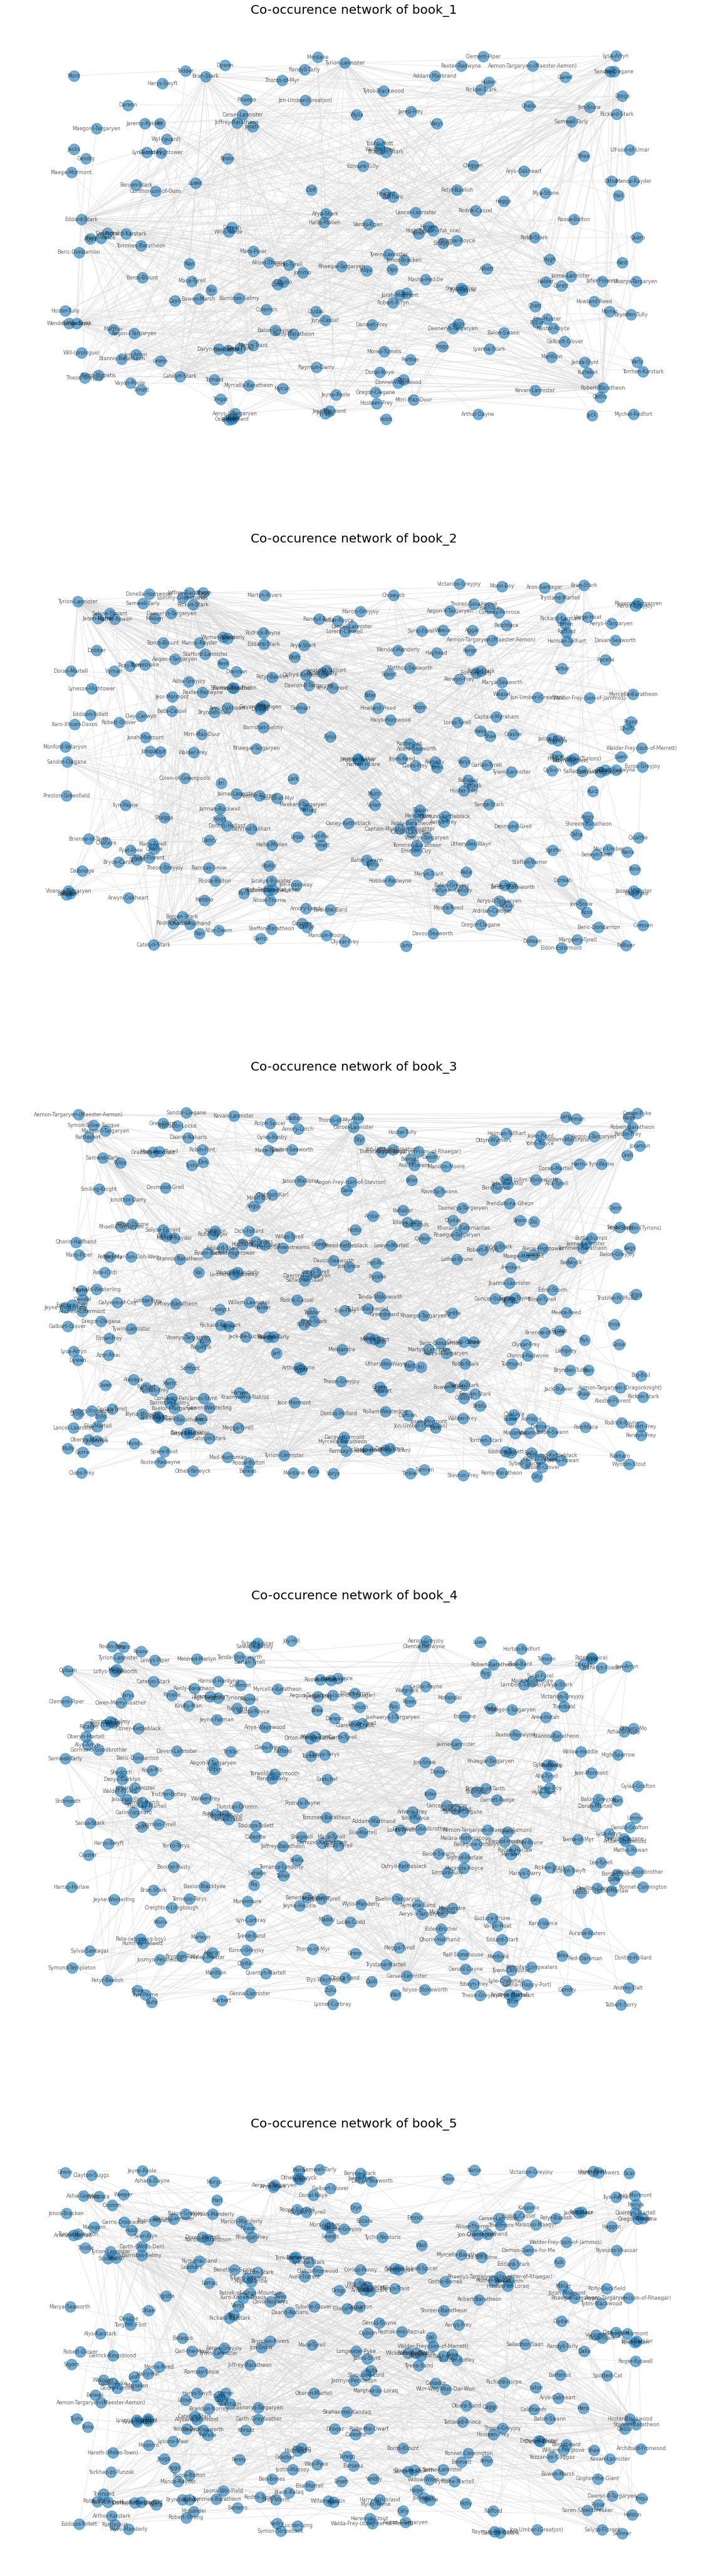

In [4]:
plt.subplots(figsize= (20,75))
for ind,book in enumerate(books):
    plt.subplot(5,1,ind+1)
    pos = nx.random_layout(book)
    nx.draw_networkx(
        book,
        pos= pos,
        edge_color= '0.85',
        node_size= 300,
        alpha= 0.6,
        font_size= 8
    )
    plt.title('Co-occurence network of book_'+str(ind+1), fontdict= {'size':20})
    plt.axis('off')

We can see that these networks are very dense and it is not possible to get any observations from it. Therefore we study these networks using different metrics like -: 

1. <b>radius</b>: Minimum eccentricity in the network
2. <b>diameter</b>: Maximum distance between any pair of the nodes
3. <b>average shortest distance</b>: Average of all shortest paths in the network
4. <b>min/max degree</b>: Min/Max of all degrees in the network

We also check whether these networks are <b>bipartite</b> or are <b>strongly connected</b>

In [5]:
for ind,book in enumerate(books):
    print("Metrics of book_"+str(ind+1))
    print(f"Max degree in the network {max(nx.degree(book), key= lambda x: x[1])}")
    print(f"Min degree in the network {min(nx.degree(book), key= lambda x: x[1])}")
    print(f"Diameter of the network {nx.diameter(book)}")
    print(f"Radius of the network {nx.radius(book)}")
    print(f"Average shorted path lenght {nx.average_shortest_path_length(book)}")
    print(f"Is Bipartite? {nx.is_bipartite(book)}")
    print(f"Is Connected? {nx.is_connected(book)}")
    print('\n')

Metrics of book_1
Max degree in the network ('Eddard-Stark', 66)
Min degree in the network ('Clydas', 1)
Diameter of the network 7
Radius of the network 4
Average shorted path lenght 2.9124259674544306
Is Bipartite? False
Is Connected? True


Metrics of book_2
Max degree in the network ('Tyrion-Lannister', 53)
Min degree in the network ('Aegon-V-Targaryen', 1)
Diameter of the network 8
Radius of the network 4
Average shorted path lenght 3.416838765675975
Is Bipartite? False
Is Connected? True


Metrics of book_3
Max degree in the network ('Tyrion-Lannister', 59)
Min degree in the network ('Aegon-Targaryen-(son-of-Rhaegar)', 1)
Diameter of the network 8
Radius of the network 4
Average shorted path lenght 3.3839966778134767
Is Bipartite? False
Is Connected? True


Metrics of book_4
Max degree in the network ('Jaime-Lannister', 64)
Min degree in the network ('Aegon-Targaryen-(son-of-Rhaegar)', 1)
Diameter of the network 10
Radius of the network 5
Average shorted path lenght 3.982888158070

From these measures we can see that the networks of each novel are strongly connected and not Bipartite.The average shortest path length in the network is about 3 to 4, which shows that most characters are weaved together very closely in the novels.<br>



The next task is to determine the most important characters in each of the novels. There are different measures for importance - centrality. 

* Degree centrality
* Betweeness centrality
* Page Rank

Each of these measures have different significance and importance and therefore we use all three centrality measures to find the most important characters for each novel. 
Along with the important character, the evolution of character importance over the 5 novels is also visualized. The evolution shows the shift in the story line and importance of some character decreases or increases in the story



<br>
First let us find the important characters as per Degree centrality. It measures the fraction of degree of the node (in and out) upon the total number of nodes. More the degree centrality of a node, more important that node is.

Important characters in book_1
('Eddard-Stark', 0.3548387096774194)
('Robert-Baratheon', 0.2688172043010753)
('Tyrion-Lannister', 0.24731182795698928)
('Catelyn-Stark', 0.23118279569892475)
('Jon-Snow', 0.19892473118279572)
('Robb-Stark', 0.18817204301075272)
('Sansa-Stark', 0.18817204301075272)
('Bran-Stark', 0.17204301075268819)
('Cersei-Lannister', 0.16129032258064518)
('Joffrey-Baratheon', 0.16129032258064518)


Important characters in book_2
('Tyrion-Lannister', 0.2054263565891473)
('Joffrey-Baratheon', 0.1821705426356589)
('Cersei-Lannister', 0.16666666666666666)
('Arya-Stark', 0.15503875968992248)
('Stannis-Baratheon', 0.1434108527131783)
('Robb-Stark', 0.13565891472868216)
('Catelyn-Stark', 0.12790697674418605)
('Theon-Greyjoy', 0.12403100775193798)
('Renly-Baratheon', 0.12015503875968991)
('Bran-Stark', 0.11627906976744186)


Important characters in book_3
('Tyrion-Lannister', 0.19536423841059603)
('Jon-Snow', 0.17218543046357615)
('Joffrey-Baratheon', 0.16556291390728478)
('R

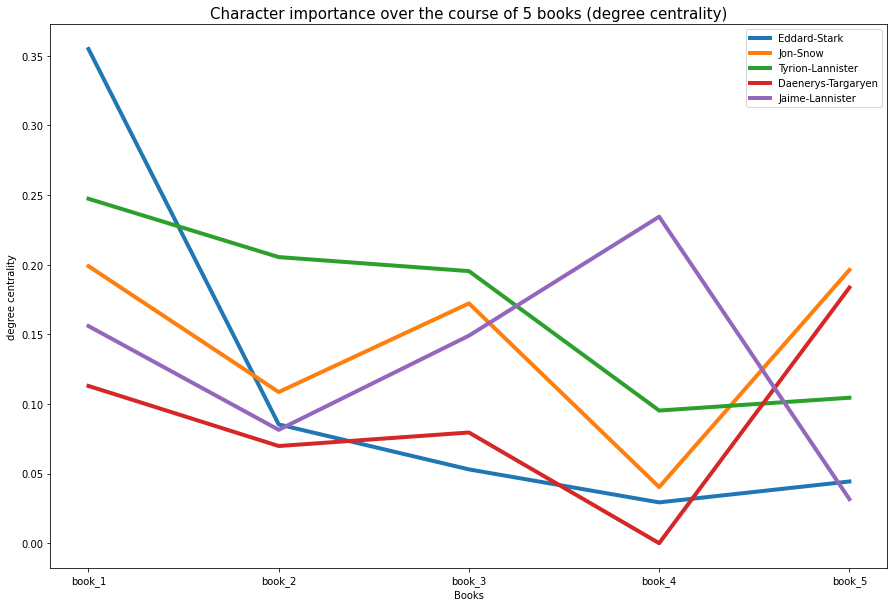

In [6]:
imp_chars_by_book = defaultdict(list)

for ind,book in enumerate(books):
    deg_centrality = nx.degree_centrality(book)
    sorted_deg_centrality = sorted(deg_centrality.items(), key= lambda k: k[1], reverse= True)[:10]
    imp_chars_by_book["book_"+str(ind+1)] = sorted_deg_centrality
    
for key,item in imp_chars_by_book.items():
    print(f"Important characters in {key}")
    for char in item:
        print(char)
    print('\n')
    
all_chars_deg_centrality = [nx.degree_centrality(book) for book in books]
char_evol = pd.DataFrame.from_records(all_chars_deg_centrality)
char_evol.fillna(0, inplace= True)

plt.figure(figsize=(15,10))
chars = ['Eddard-Stark','Jon-Snow', 'Tyrion-Lannister', 'Daenerys-Targaryen', 'Jaime-Lannister']

for char in chars:
    plt.plot(char_evol[char], label= char, linewidth= 4)
plt.xticks(ticks= [0,1,2,3,4], labels= ['book_'+str(i+1) for i in range(0,5)])
plt.xlabel('Books')
plt.ylabel('degree centrality')
plt.title('Character importance over the course of 5 books (degree centrality)', fontdict= {'size':15})
plt.legend()

<br><br>
The next measure is the betweeness centrality. It measures the fraction of shortest paths between a pair of nodes that passes through a node , over all the shortest paths between a pair of nodes. It assumes that a node is important if it connects many other nodes i.e. is in the shortest paths for many node connections.

Important characters in book_1
('Eddard-Stark', 0.2696038913836117)
('Robert-Baratheon', 0.21403028397371796)
('Tyrion-Lannister', 0.1902124972697492)
('Jon-Snow', 0.17158135899829566)
('Catelyn-Stark', 0.1513952715347627)
('Daenerys-Targaryen', 0.08627015537511595)
('Robb-Stark', 0.07298399629664767)
('Drogo', 0.06481224290874964)
('Bran-Stark', 0.05579958811784442)
('Sansa-Stark', 0.03714483664326785)


Important characters in book_2
('Arya-Stark', 0.1881116846731781)
('Jon-Snow', 0.17443976935054054)
('Robb-Stark', 0.1649406213117506)
('Tyrion-Lannister', 0.15532375650368552)
('Robert-Baratheon', 0.15374366220396257)
('Theon-Greyjoy', 0.14439534223860254)
('Stannis-Baratheon', 0.11951360907930143)
('Bran-Stark', 0.11323494837768544)
('Catelyn-Stark', 0.11104383596371503)
('Joffrey-Baratheon', 0.09078190285323477)


Important characters in book_3
('Jon-Snow', 0.2238286056882584)
('Robert-Baratheon', 0.1664354010358413)
('Robb-Stark', 0.16232085177685468)
('Tyrion-Lannister', 0.154090

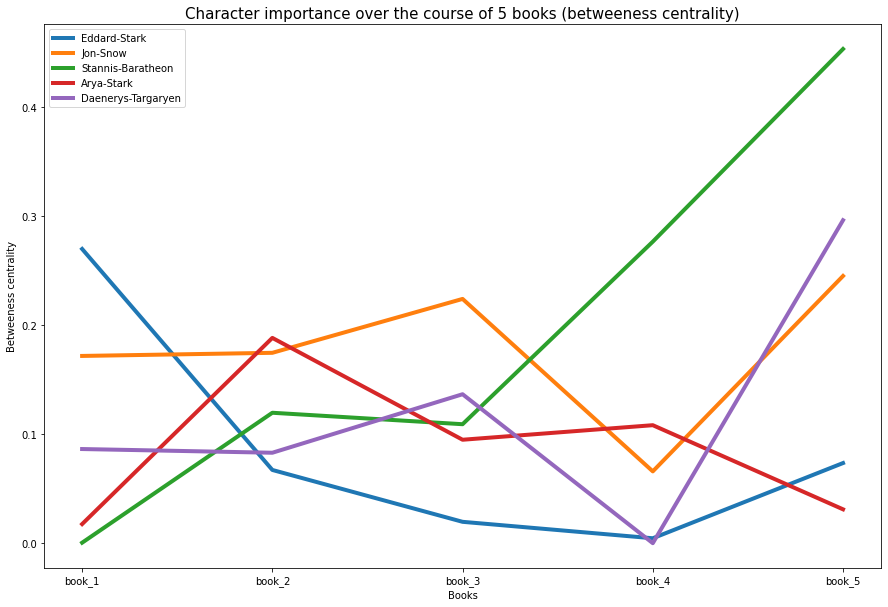

In [7]:
imp_chars_by_book = defaultdict(list)

for ind,book in enumerate(books):
    btw_centrality = nx.betweenness_centrality(book)
    sorted_btw_centrality = sorted(btw_centrality.items(), key= lambda k: k[1], reverse= True)[:10]
    imp_chars_by_book["book_"+str(ind+1)] = sorted_btw_centrality
    
for key,item in imp_chars_by_book.items():
    print(f"Important characters in {key}")
    for char in item:
        print(char)
    print('\n')

    all_chars_btw_centrality = [nx.betweenness_centrality(book) for book in books]
char_evol = pd.DataFrame.from_records(all_chars_btw_centrality)
char_evol.fillna(0, inplace=True)

chars = ['Eddard-Stark','Jon-Snow','Stannis-Baratheon','Arya-Stark','Daenerys-Targaryen']

plt.figure(figsize=(15,10))
for char in chars:
    plt.plot(char_evol[char], label= char, linewidth= 4)
plt.xticks(ticks= [0,1,2,3,4], labels= ['book_'+str(i+1) for i in range(5)])
plt.xlabel('Books')
plt.ylabel('Betweeness centrality')
plt.title('Character importance over the course of 5 books (betweeness centrality)', fontdict= {'size':15})
plt.legend()

<br><br>
The next measure is the Page Rank. It assumes that important nodes in the network are those, which are reachable by many other nodes. If a random walk is conducted on the network, the pagerank gives the probability of the random walker to end up at that node

Important characters in book_1
('Eddard-Stark', 0.07236162026570049)
('Robert-Baratheon', 0.04849367196106829)
('Jon-Snow', 0.04770801150205558)
('Tyrion-Lannister', 0.04367631315626212)
('Catelyn-Stark', 0.034666613211363564)
('Bran-Stark', 0.02977004993932226)
('Robb-Stark', 0.029214217154195955)
('Daenerys-Targaryen', 0.027098612952214246)
('Sansa-Stark', 0.02694466267974004)
('Cersei-Lannister', 0.02162037092438613)


Important characters in book_2
('Tyrion-Lannister', 0.04686929713792865)
('Joffrey-Baratheon', 0.033513892358559505)
('Bran-Stark', 0.032065388319908704)
('Arya-Stark', 0.029019038425504032)
('Stannis-Baratheon', 0.028821248941048688)
('Jon-Snow', 0.028400705671148066)
('Theon-Greyjoy', 0.027659723368278766)
('Cersei-Lannister', 0.02744097889097779)
('Robb-Stark', 0.023135078569057405)
('Renly-Baratheon', 0.022946184909194596)


Important characters in book_3
('Jon-Snow', 0.03795412593887354)
('Tyrion-Lannister', 0.0363931547858565)
('Robb-Stark', 0.027921656742283557

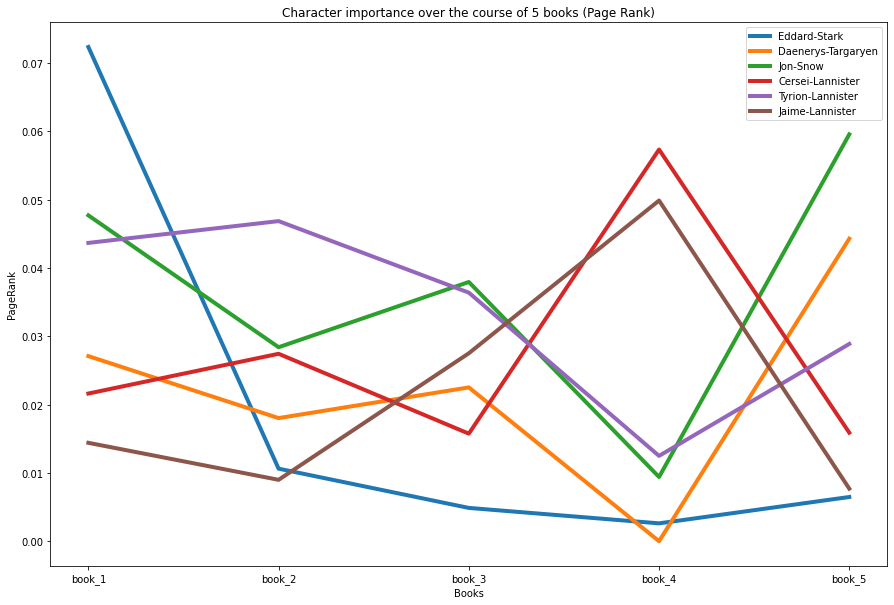

In [8]:
imp_chars_by_book = defaultdict(list)

for ind,book in enumerate(books):
    pageRank = nx.pagerank(book)
    sorted_pagerank_centrality = sorted(pageRank.items(), key= lambda k: k[1], reverse= True)[:10]
    imp_chars_by_book["book_"+str(ind+1)] = sorted_pagerank_centrality
    
for key,item in imp_chars_by_book.items():
    print(f"Important characters in {key}")
    for char in item:
        print(char)
    print('\n')
    
all_chars_pagerank = [nx.pagerank(book) for book in books]
char_evol = pd.DataFrame.from_records(all_chars_pagerank)
char_evol.fillna(0, inplace= True)

chars = ['Eddard-Stark','Daenerys-Targaryen','Jon-Snow','Cersei-Lannister','Tyrion-Lannister','Jaime-Lannister']

plt.figure(figsize= (15,10))
for char in chars:
    plt.plot(char_evol[char], label= char, linewidth= 4)
plt.xticks(ticks= [0,1,2,3,4], labels= ['book_'+str(i+1) for i in range(5)])
plt.xlabel('Books')
plt.ylabel('PageRank')
plt.title('Character importance over the course of 5 books (Page Rank)')
plt.legend()

<br><br>
Each measure, had different results based on different assumptions as to what is considered as an important charateristic. Thus to understand if each measure, deviates from the other, correlation is found between the 3 metrics, with respect to each book.

In [9]:
for ind,book in enumerate(books):
    measures = [nx.pagerank(book), 
                nx.betweenness_centrality(book, weight='weight'), 
                nx.degree_centrality(book)]
    cor_df = pd.DataFrame.from_records(measures,index= ['pagerank','betweeness','degree'])
    print("Correlation between centrality measures for book_"+str(ind+1))
    print(cor_df.T.corr())
    print('\n')

Correlation between centrality measures for book_1
            pagerank  betweeness    degree
pagerank    1.000000    0.870210  0.949258
betweeness  0.870210    1.000000  0.871385
degree      0.949258    0.871385  1.000000


Correlation between centrality measures for book_2
            pagerank  betweeness    degree
pagerank    1.000000    0.796071  0.946047
betweeness  0.796071    1.000000  0.824200
degree      0.946047    0.824200  1.000000


Correlation between centrality measures for book_3
            pagerank  betweeness    degree
pagerank    1.000000    0.822604  0.955832
betweeness  0.822604    1.000000  0.841844
degree      0.955832    0.841844  1.000000


Correlation between centrality measures for book_4
            pagerank  betweeness    degree
pagerank    1.000000    0.656856  0.946802
betweeness  0.656856    1.000000  0.720553
degree      0.946802    0.720553  1.000000


Correlation between centrality measures for book_5
            pagerank  betweeness    degree
pagera

In all the books, the different measures show a high correlation, proving that the results don't deviate much between them, therefore the character importances found are reliable and accurate in terms of the network, as the same pattern is confirmed thrice.

<br><br>
<b> DETECTING COMMUNITIES IN THE NETWORK <b>
    
Community detection is to find clusters or groups in the network such that, the nodes within the community are highly connected as compared to outside the network. In terms of Game of Thrones, community detection can give insight into what groups of characters interact more within as compared to others.
    
Many characters are side characters and probably occur just twice or thrice, and have very limited interaction. We will not consider those characters as they just make the communities larger and dont add much value. Hence all those nodes having degree lesser than 4 are not considered for community detection.

    
The algorithm used is the Girvan Newman algorithm, which detects communities based on betweeness centrality and modularity scores.

In [10]:
sub_books = []
for book in books:
    nodes_to_keep = [name for name,deg in dict(nx.degree(book)).items() if deg > 4]
    sub_books.append(book.subgraph(nodes_to_keep))

In [11]:
def color_communities(comm,n):
    """
    Color each node to represent the community
    
    parameters:
        comm: List of communities
        n: node
    
    returns:
        str: color in hex string
    """
    
    for ind,c in enumerate(comm):
        if n in c:
            return default_colors[ind]

<br><br>
Below is the implementation of the Girvan Newman algorithm.

The Girvan Newman algorithm works on a divisive strategy i.e. intitally the entire network is one community and iteratively breaks down to furtber communities. Hence, for each split i.e. number of communities formed, the modularity and performance scores are tallied. The number of communities giving highest modularity score is the chosen set

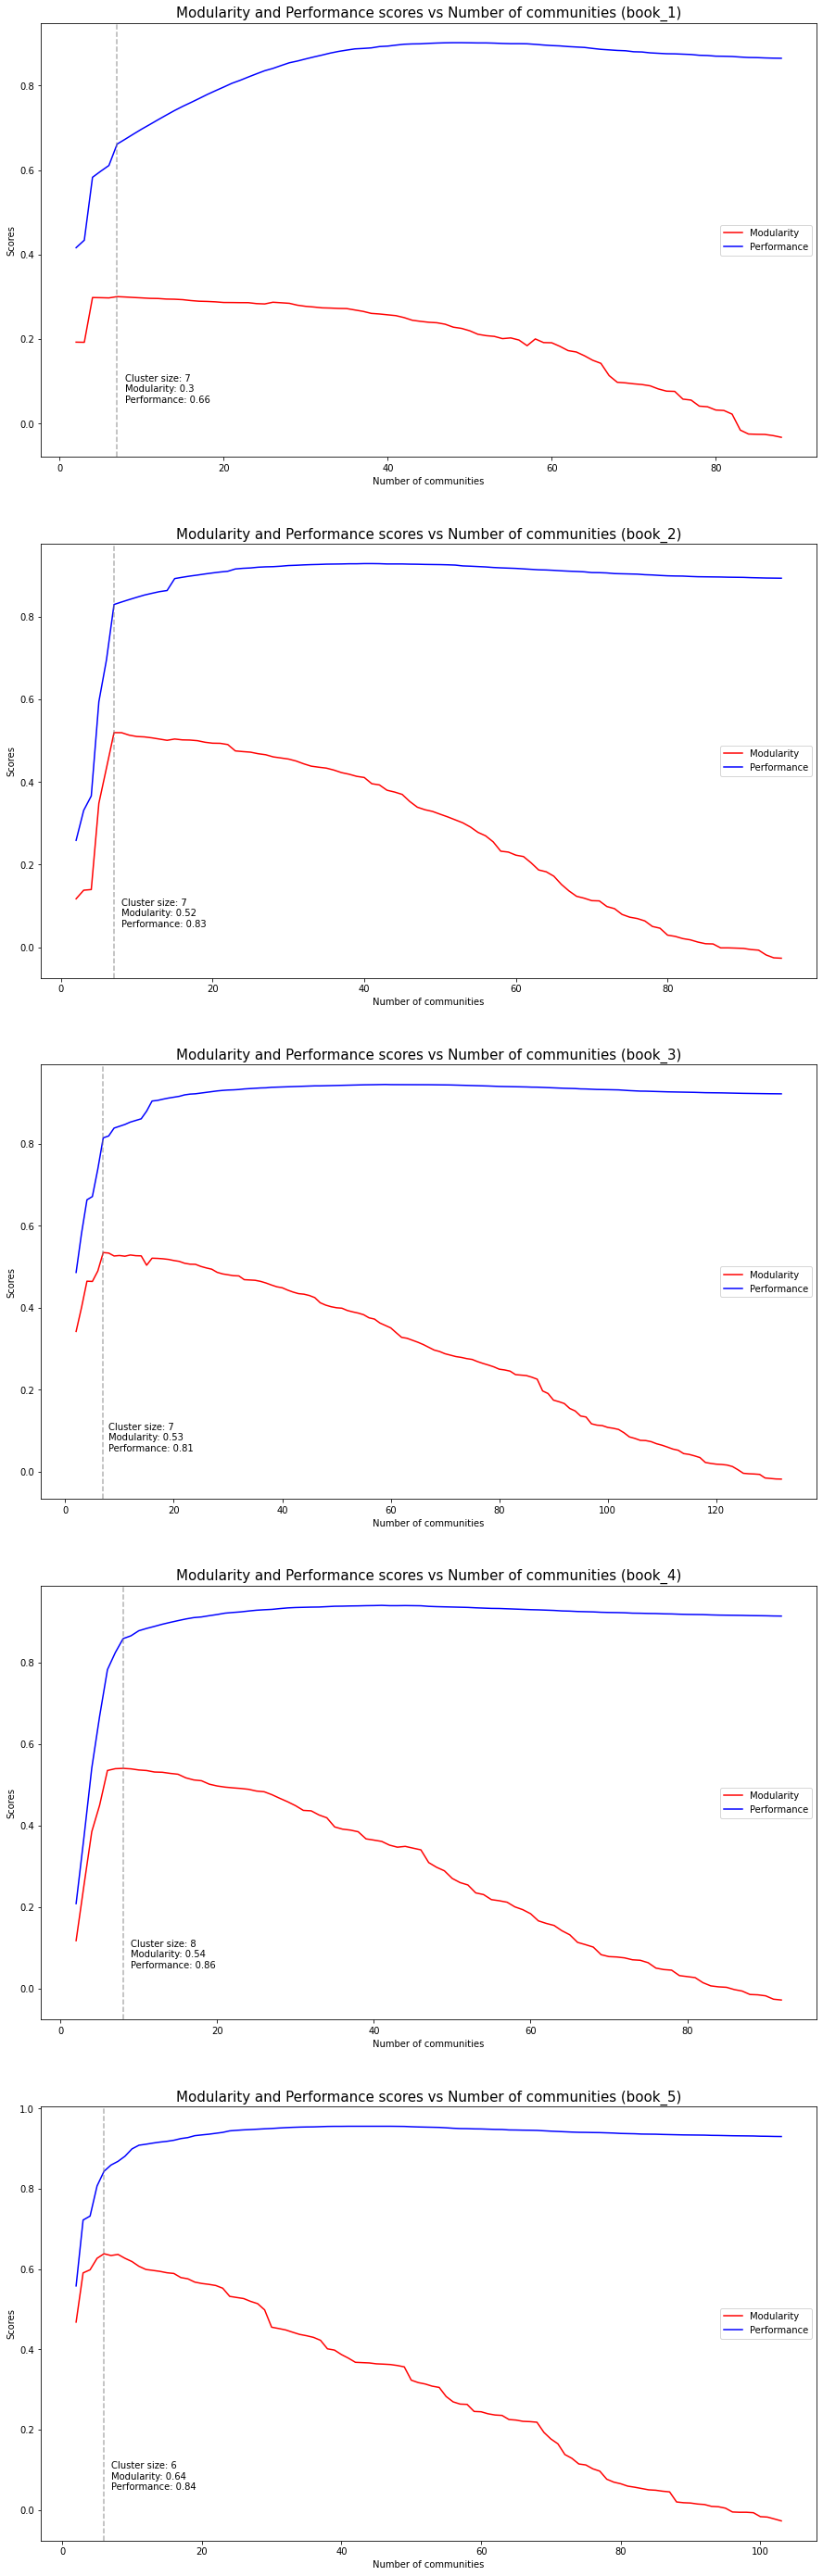

In [12]:
plt.figure(figsize= (15,50))
final_comm = []

for ind,book in enumerate(sub_books):
    g = nx.community.girvan_newman(book)
    gn_comm = []
    for i in g:
        gn_comm.append(i)
    
    plt.subplot(5,1,ind+1)
    mod_scores = [nx.community.modularity(book,g) for g in gn_comm]
    perf_scores = [nx.community.performance(book, g) for g in gn_comm]
    clusters = [x for x in range(2,len(gn_comm[-1])+1)]


    plt.plot(clusters, mod_scores, label= 'Modularity', color= 'r')
    plt.plot(clusters, perf_scores, label= 'Performance', color = 'b')
    plt.axvline(x= clusters[np.argmax(mod_scores)], color= 'grey', linestyle= '--', alpha= 0.6)
    plt.annotate(
        xy=(clusters[np.argmax(mod_scores)]+1,0.05),
        text='Cluster size: {}\nModularity: {}\nPerformance: {}'.format(
            clusters[np.argmax(mod_scores)],
            round(max(mod_scores),2),
            round(perf_scores[np.argmax(mod_scores)],2)
    ))
    plt.title("Modularity and Performance scores vs Number of communities (book_"+str(ind+1)+")", fontdict= {'size':15})
    plt.xlabel('Number of communities')
    plt.ylabel('Scores')
    plt.legend()
    final_comm.append(gn_comm[np.argmax(mod_scores)])

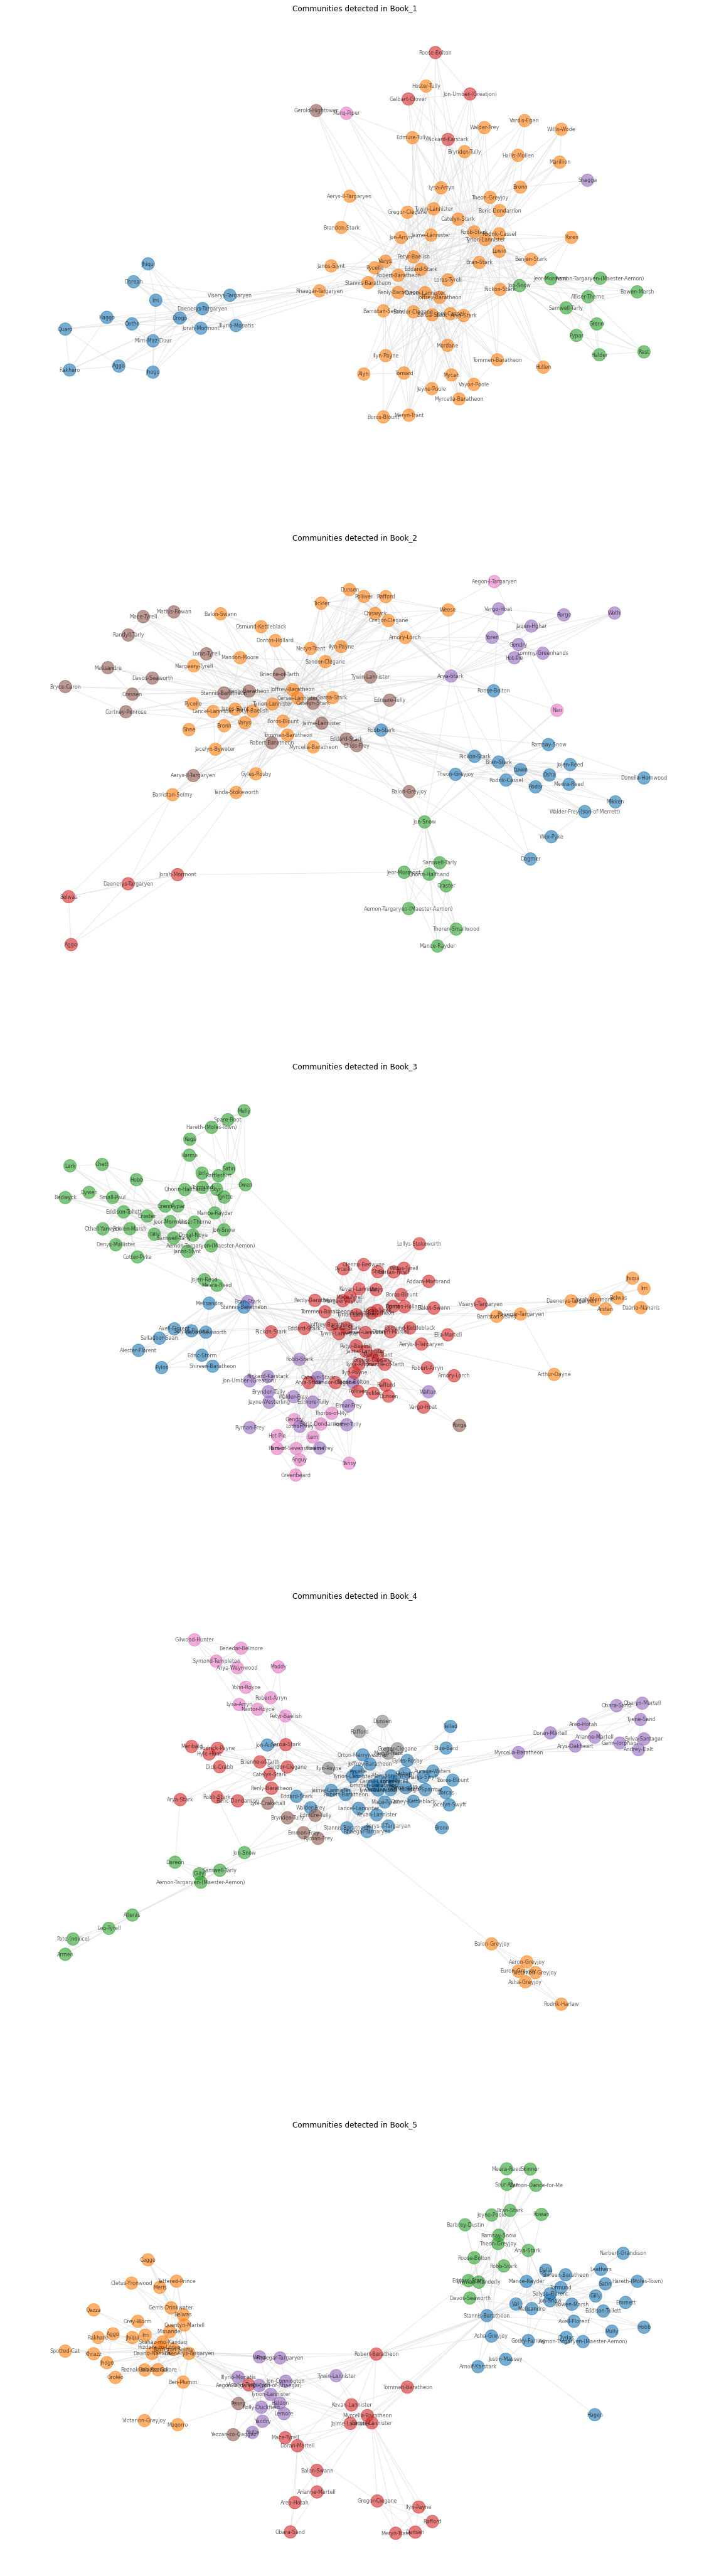

In [13]:
plt.subplots(figsize= (20,75))

for ind,(book,comm) in enumerate(zip(sub_books, final_comm)):
    color = [color_communities(comm, n) for n in book.nodes()]
    plt.subplot(5,1,ind+1)
    pos= nx.layout.fruchterman_reingold_layout(book)
    nx.draw_networkx(
        book,
        alpha= 0.6,
        node_size= 400,
        node_color= color,
        edge_color= '0.85',
        font_size= 8,
        pos= pos
    )
    plt.title('Communities detected in Book_'+str(ind+1))
    plt.axis('off')

The following communities have been discovered in each book:-

* <b>Book 1</b> - There are main 4 communities discovered. The first and the biggest (blue), which shows the interactions of the Baratheon, Stark family and all related characters in Winterfell and later King's Landing (Eddard Stark's becoming Hand of the King). The other community is that of Daenerys Targaryena and her interactions in Essos with Drogo, Jorah and related characters (orange). Apart from these, there are two smaller communities, one of the Night Watch (red) and the other of the Vassal families of the Stark (Kingdoms in North) (green). The rest single node communities are considered as noise.


* <b>Book 2</b> - The book 2 shows 2 larger communities and 4 smaller communities. One large community is of the Lannister family, Baratheon kids - Joffrey and Tommen with other related characters (blue). The other large community is between the related charactes of Stannis Baratheon and Renly Baratheon (red). Then there are 4 smaller ones - One of the Night's watch and Jon snow (brown), Daenerys Targaryen and related characters (purple), Arya Stark and her interaction with people on her journey (orange) and lastly the Stark's interactions bracing for a war (green). Single node communities are considered as noise.


* <b>Book 3</b> -  There are 6 communities in book 3. Each community is large enough. One community is of the Night's watch (blue), which is now larger and with more characters. The next community is of the Lannister/Baratheon family and their interaction in King's landing (green). One community (purple) is of Daenerys Targaryen and her journey in Essos to build an army. Then there are 3 a little smaller communities - Stannis Baratheon at DragonStone (brown), Arya Stark and related characters (red) and finally the Stark family alongside other Lords of the North (orange).


* <b>Book 4</b> - Book 4 consists of one very large community and then 7 very small commmunities. The large community is of the Lannister family again, in King's landing (blue). The rest 6 smaller communities are - Jon Snow and the Night's watch (purple), The Stark faimly (green), The lord of the Eyrie and knights of the Vale (brown), The Greyjoy family (grey) and the Tully family (pink) and lastly the smallest community of Gregor Clegane and his knights (red).


* <b>Book 5</b> - There are 5 main communities detected in book 5, all are larger communities. The largest community is of Daenerys Targaryen (orange). One community is of Stannis Baratheon (green). Then there are 3 more a little smaller communities - Stark family and other Boltons (blue), Lannister family (red) and the last one is of characters having brief interactons with the Targaryen family (purple).


As the story progresses, we can see the evolution of the communities and interactions between the characters.